In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
data = pd.read_csv("Customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [169]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [170]:
data.drop("customerID", axis = 1, inplace = True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [171]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [172]:
data.head(1)["TotalCharges"] # string type

0    29.85
Name: TotalCharges, dtype: object

In [173]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [174]:
data["TotalCharges"] = pd.to_numeric(data.TotalCharges, errors = "coerce")

In [175]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [176]:
data.shape

(7043, 20)

In [177]:
df1 = data[data["TotalCharges"].isna() == False] # getting rid of rows with TotalCharges is nan

In [178]:
df1.shape

(7032, 20)

In [179]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [180]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [181]:
df1.shape

(7032, 20)

In [182]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [183]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
cont_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [184]:
# churn_no = df1[df1.Churn == "No"]
# churn_yes = df1[df1.Churn == "Yes"]
# churn_no.shape, churn_yes.shape

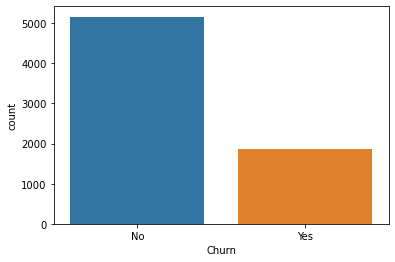

In [185]:
sns.countplot(x= "Churn", data= df1)

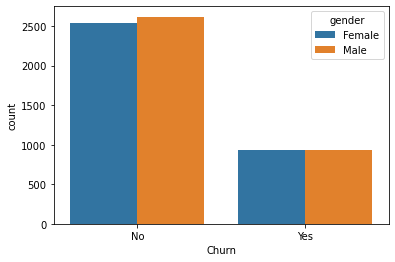

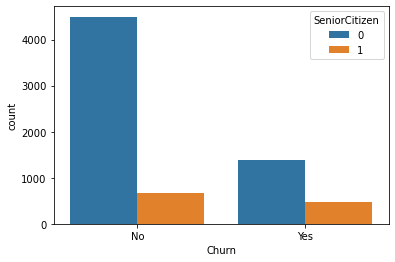

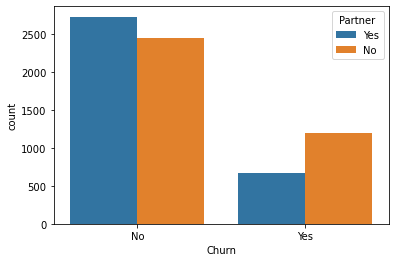

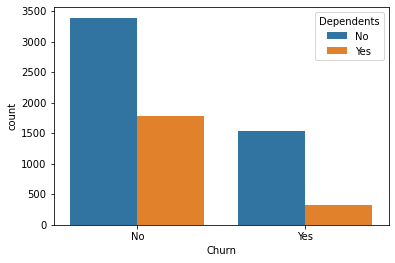

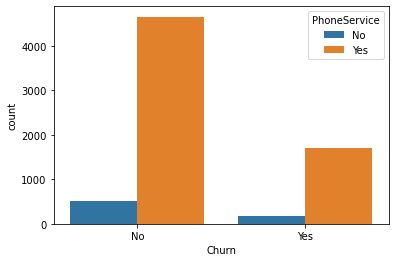

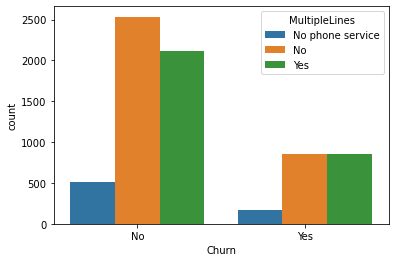

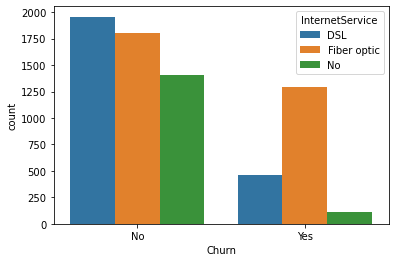

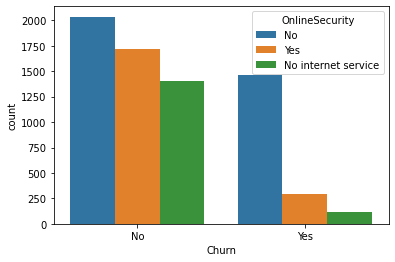

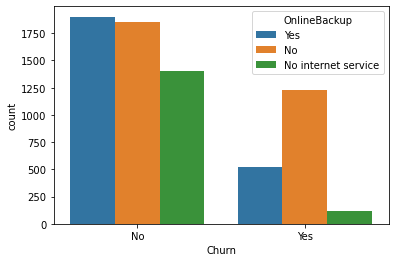

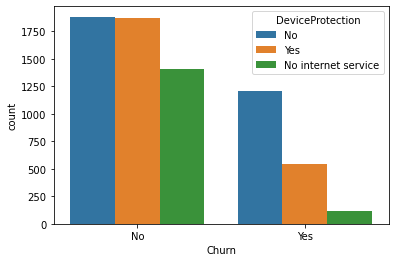

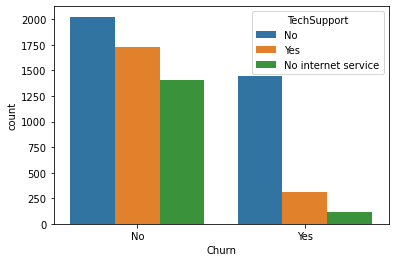

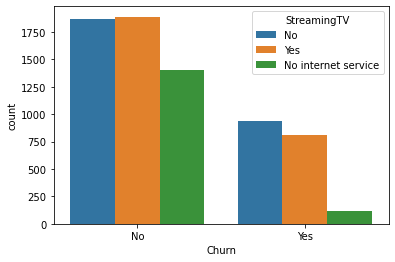

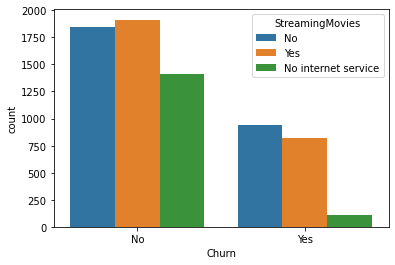

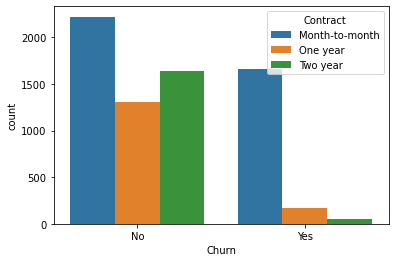

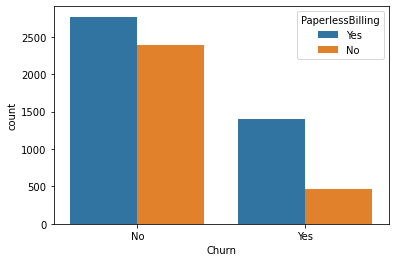

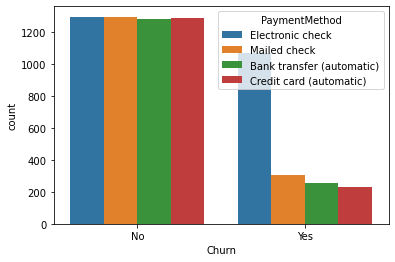

In [186]:
for i in cat_features:
    sns.countplot(x= "Churn",hue= i,data= df1) 
    plt.show()

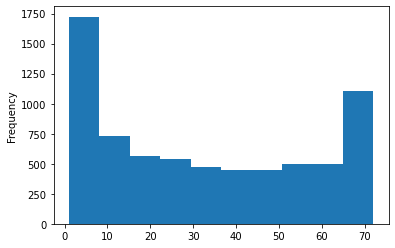

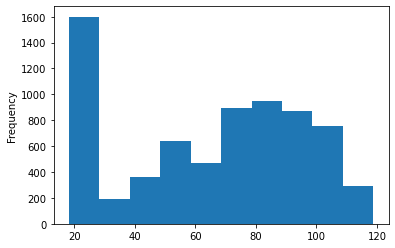

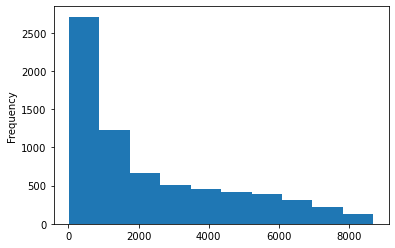

In [187]:
for i in cont_features:
    df1[i].plot.hist()
    plt.show()

In [188]:
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()

In [189]:
for i in cat_features:
    df1[i]= en.fit_transform(df1[i])

<ipython-input-189-1dd810dd7dcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]= en.fit_transform(df1[i])


In [190]:
df1["Churn"]= en.fit_transform(df1["Churn"])

<ipython-input-190-2d43cc5ea46c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Churn"]= en.fit_transform(df1["Churn"])


In [191]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [192]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


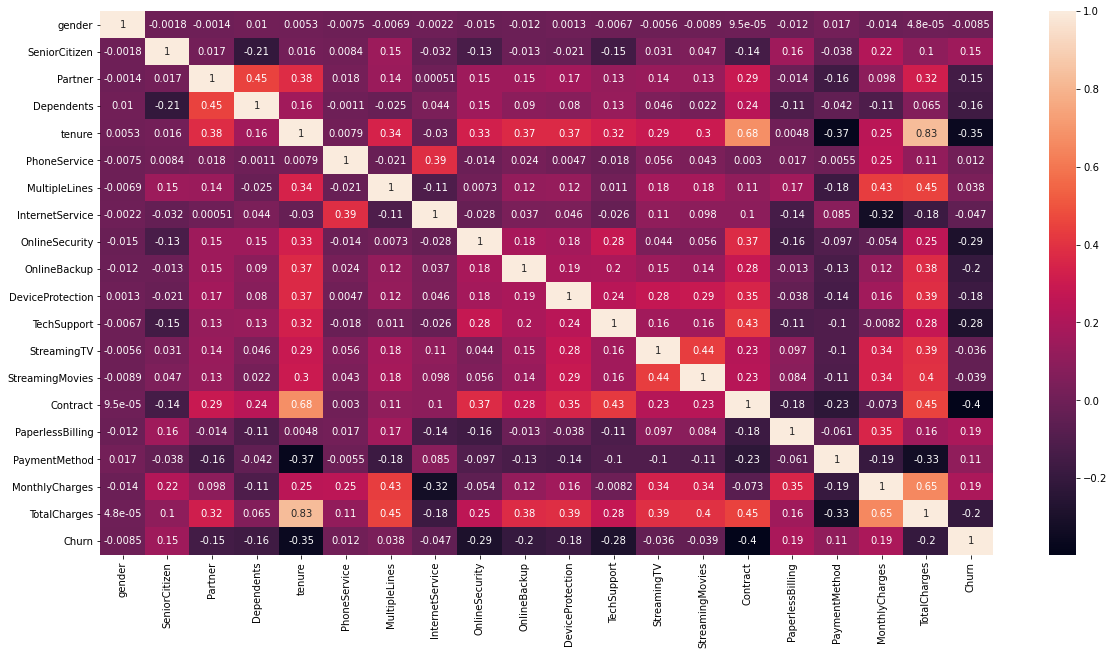

In [193]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize= fig_dims)
sns.heatmap(df1.corr(),annot= True, ax=ax)

In [194]:
y = df1["Churn"]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [195]:
X = df1.drop("Churn", axis = 1)

In [196]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [204]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X["tenure"] = sc.fit_transform(X[["tenure"]])
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,0.140845,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,0.042254,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [206]:
X["MonthlyCharges"] = sc.fit_transform(X[["MonthlyCharges"]])
X["TotalCharges"] = sc.fit_transform(X[["TotalCharges"]])
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,0.227521
7039,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,0.847461
7040,0,0,1,1,0.140845,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,0.037809
7041,1,1,1,0,0.042254,1,2,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210


In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [208]:
X_train.shape, y_train.shape

((5625, 19), (5625,))

In [209]:
X_test.shape, y_test.shape

((1407, 19), (1407,))

In [210]:
import tensorflow as tf
from tensorflow import keras

In [211]:
model = keras.Sequential([
        
        keras.layers.Dense(20, input_shape = (19,), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')    
    ])

model.compile(optimizer = "rmsprop", loss="binary_crossentropy", metrics = ["accuracy"])

In [212]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                400       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [217]:
history = model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8105
Epoch 2/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.8100
Epoch 3/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8085
Epoch 4/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.8078
Epoch 5/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.8103
Epoch 6/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8094
Epoch 7/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8092
Epoch 8/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.8078
Epoch 9/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4028 - accuracy: 0.8089
Epoch 10/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8105

In [218]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8031


[0.41136327385902405, 0.8031272292137146]

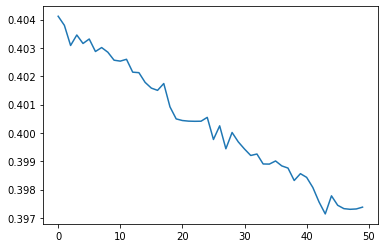

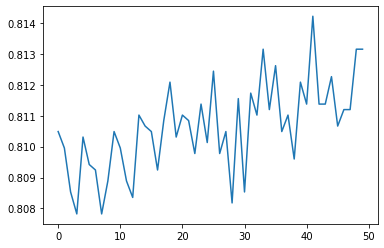

In [221]:
plt.plot(history.history["loss"])
plt.show()
plt.plot(history.history["accuracy"])

In [239]:
y_test[6:11]

6604    0
6305    1
5999    0
4556    1
6368    1
Name: Churn, dtype: int32

In [240]:
y_pred = model.predict([X_test[6:11]])
print(y_pred)
y_pred = np.where(y_pred>0.5, 1, 0)
print(y_pred)

[[0.54873455]
 [0.56965554]
 [0.14776182]
 [0.7215464 ]
 [0.9420228 ]]
[[1]
 [1]
 [0]
 [1]
 [1]]


In [245]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>0.5, 1, 0)

In [258]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1046
           1       0.64      0.52      0.58       361

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.80      1407



Text(33.0, 0.5, 'Truth')

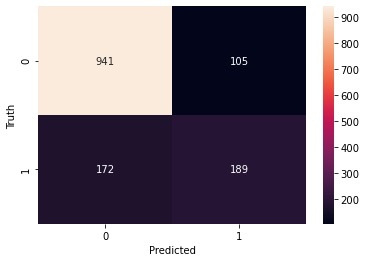

In [262]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
# model = keras.Sequential([
        
#         keras.layers.Dense(20, input_shape = (19,), activation='relu'),
#         keras.layers.Dense(1, activation='sigmoid')    
#     ])

# model.compile(optimizer = "rmsprop", loss="binary_crossentropy", metrics = ["accuracy"])

In [263]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Input(shape=(19,))) # number of input features = number of neurons in input layer           
model2.add(tf.keras.layers.Dense(100, activation = "relu")) # random number of neurons in hidden layer
model2.add(tf.keras.layers.Dense(1, activation = "sigmoid")) # 1 neuron in output layer

model2.compile(optimizer = "rmsprop", loss="binary_crossentropy", metrics = ["accuracy"])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               2000      
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________


In [264]:
hist2 = model2.fit(X_train, y_train, epochs = 50)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.4654 - accuracy: 0.7717
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.7874
Epoch 3/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.7904
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.7957
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8007
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8007
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8018
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8032
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.8046
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8064

In [265]:
model2.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.7982


[0.42155346274375916, 0.7981520891189575]

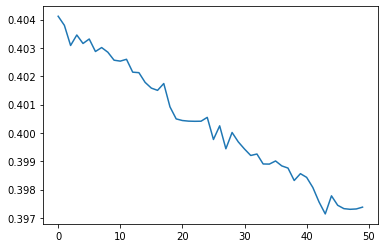

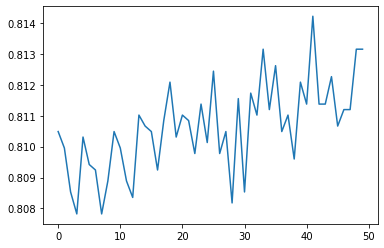

In [266]:
plt.plot(history.history["loss"])
plt.show()
plt.plot(history.history["accuracy"])

In [267]:
y_test[6:11]

6604    0
6305    1
5999    0
4556    1
6368    1
Name: Churn, dtype: int32

In [268]:
y_pred = model2.predict([X_test[6:11]])
print(y_pred)
y_pred = np.where(y_pred>0.5, 1, 0)
print(y_pred)

[[0.48643914]
 [0.445673  ]
 [0.1048761 ]
 [0.70005506]
 [0.9188118 ]]
[[0]
 [0]
 [0]
 [1]
 [1]]


In [269]:
y_pred = model2.predict(X_test)
y_pred = np.where(y_pred>0.5, 1, 0)

In [270]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1046
           1       0.66      0.44      0.53       361

    accuracy                           0.80      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.80      0.78      1407



Text(33.0, 0.5, 'Truth')

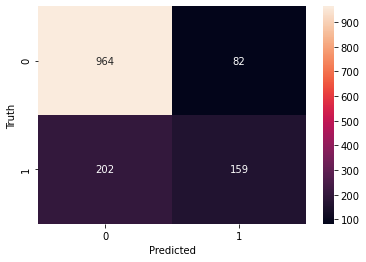

In [273]:
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

#### Confusion matrix of model

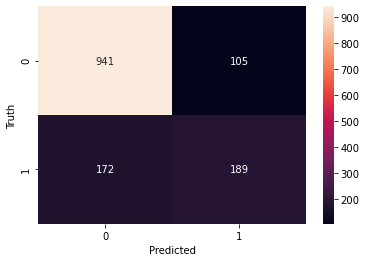

#### Confusion matrix of model2

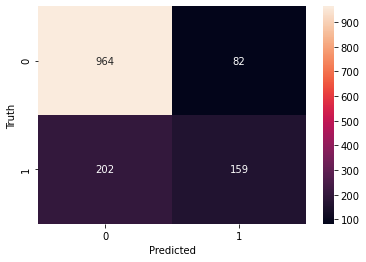

# model

precision    recall  f1-score   support

           0       0.85      0.90      0.87      1046
           1       0.64      0.52      0.58       361

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.80      1407

In [286]:
# model: 
precision_0 = round(941/(941+172),2)
precision_1 = round(189/(189+105),2)
recall_0 = round(941/(941+105),2)
recall_1 = round(189/(189+172),2)
print("Model 1: Precision (0): "+str(precision_0) + " Precision (1): "+str(precision_1) + " Recall (0): "+str(recall_0) + " Recall (1): "+str(recall_1))

Model 1: Precision (0): 0.85 Precision (1): 0.64 Recall (0): 0.9 Recall (1): 0.52


# model2

precision    recall  f1-score   support

           0       0.83      0.92      0.87      1046
           1       0.66      0.44      0.53       361

    accuracy                           0.80      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.80      0.78      1407


In [288]:
# model 2: 
precision_0 = round(964/(964+202),2)
precision_1 = round(159/(159+82),2)
recall_0 = round(964/(964+82),2)
recall_1 = round(159/(159+202),2)
                 
print("Model 2: Precision (0): "+str(precision_0) + " Precision (1): "+str(precision_1) + " Recall (0): "+str(recall_0) + " Recall (1): "+str(recall_1))

Model 2: Precision (0): 0.83 Precision (1): 0.66 Recall (0): 0.92 Recall (1): 0.44


# Along with accuracy, Precision, Recall & F1 score for each class should be high too. Here, due to imbalanced dataset, the values are not proper